In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wavfile
import winsound
# plotting 3D complex plane
from mpl_toolkits.mplot3d import Axes3D
import os

Utils functions

In [3]:
def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))

## Question 1

The equation to be plotted and sampled is $𝑦(t) = 0.1\cos(2\pi F t)$

In [4]:
def GenSampledSinusoid(A=1,Freq=1000,Phi=0, Fs=16000,sTime=-10,eTime=10):
    n = np.arange(sTime,eTime,1.0/Fs)                       #arange does not include end value 
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return (n,y)

In [5]:
def stemplot(x,y,figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.stem(x,y,use_line_collection=True,basefmt="b")

Plotting this 1a

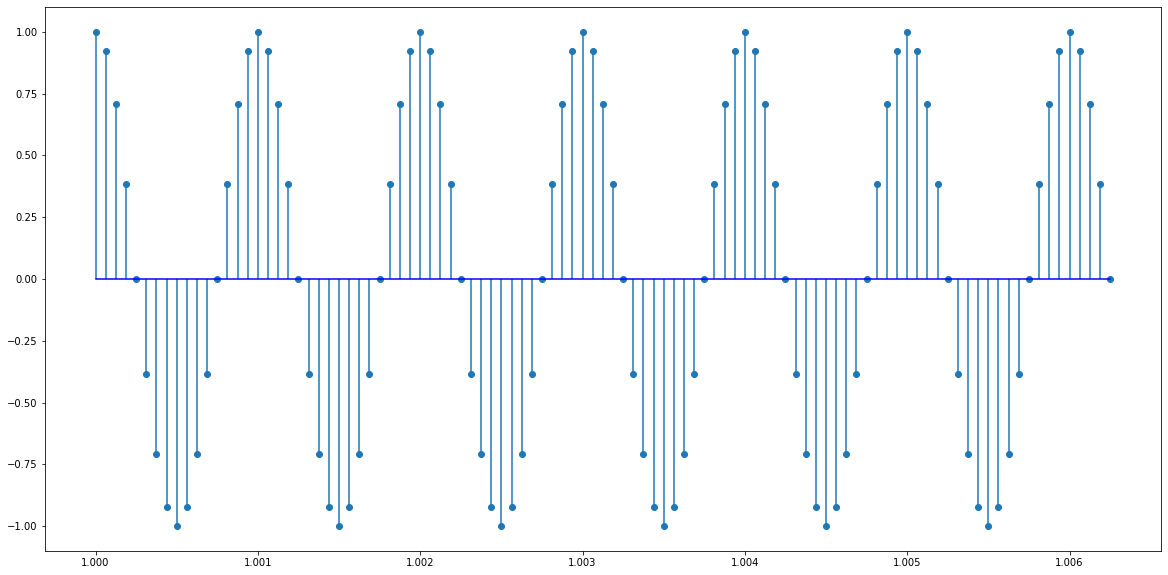

In [6]:
Fs_1a = 16000
f_1a=1000
num_pts_to_plot=100
sTime_1a=1
(x_1a,y_1a) = GenSampledSinusoid(A=1,Fs=Fs_1a,Freq=f_1a,sTime=sTime_1a,eTime=sTime_1a+1.0/Fs_1a*num_pts_to_plot)
stemplot(x_1a,y_1a,(20,10))

In [7]:
def playSoundFromWav(x,y,Fs = 16000,filename='t1_16bit.wav'):
    y_1a_16bit = fnNormalizeFloatTo16Bit(y)
    # Lets save the file, fname, sequence, and samplingrate needed
    wavfile.write(filename, Fs, y_1a_16bit)
    # Lets play the wavefile using winsound given the wavefile saved above
    #unfortunately winsound ONLY likes u16 bit values
    #thats why we had to normalize y->y_norm (16 bits) integers to play using winsounds
    winsound.PlaySound(filename, winsound.SND_FILENAME)
    #cleanup
    os.remove(filename)

In [8]:
(x_1a2,y_1a2) = GenSampledSinusoid(A=0.5,Fs=16000,Freq=1000,sTime=0,eTime=1.4)
playSoundFromWav(x_1a2,y_1a2)

Generate a bunch of files in steps defined

In [9]:
start_f=2000
stop_f=32000
step=2000
Amp = 1
Fs=16000
for f in range(start_f,stop_f+step,step):
    print(f"Playing sound for freq = {f}")
    (x,y) = GenSampledSinusoid(A=Amp,Fs=Fs,Freq=f,sTime=0,eTime=0.5)
    playSoundFromWav(x,y,Fs=Fs)

Playing sound for freq = 2000
Playing sound for freq = 4000
Playing sound for freq = 6000
Playing sound for freq = 8000
Playing sound for freq = 10000
Playing sound for freq = 12000
Playing sound for freq = 14000
Playing sound for freq = 16000
Playing sound for freq = 18000
Playing sound for freq = 20000
Playing sound for freq = 22000
Playing sound for freq = 24000
Playing sound for freq = 26000
Playing sound for freq = 28000
Playing sound for freq = 30000
Playing sound for freq = 32000


<StemContainer object of 3 artists>

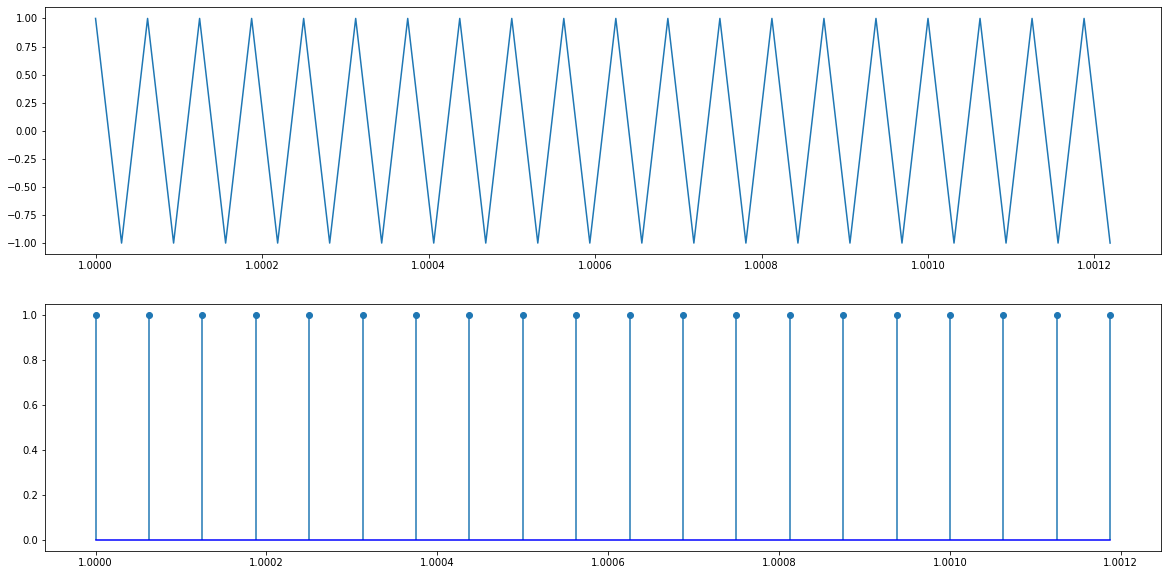

In [10]:
Fs_alias =16000
f_1a=16000
Fs_noalias = 32000
num_pts_to_plot=20
sTime_1a=1
(x_1_alias,y_1_alias) = GenSampledSinusoid(A=1,Fs=Fs_alias,Freq=f_1a,sTime=sTime_1a,eTime=sTime_1a+1.0/Fs_alias*num_pts_to_plot)
(x_1_noalias,y_1_noalias) = GenSampledSinusoid(A=1,Fs=Fs_noalias,Freq=f_1a,sTime=sTime_1a,eTime=sTime_1a+1.0/Fs_alias*num_pts_to_plot)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x_1_noalias,y_1_noalias)
plt.subplot(212)
plt.stem(x_1_alias,y_1_alias,use_line_collection=True,basefmt="b")

we can see although the original curve is 2000Hz, the alias occured as Fs < f and thus reconstructed curve has almost 0 frquency

1b 

We shall now generate \
a) y(t) \
b) y[nT] \
for 6 cycles

<StemContainer object of 3 artists>

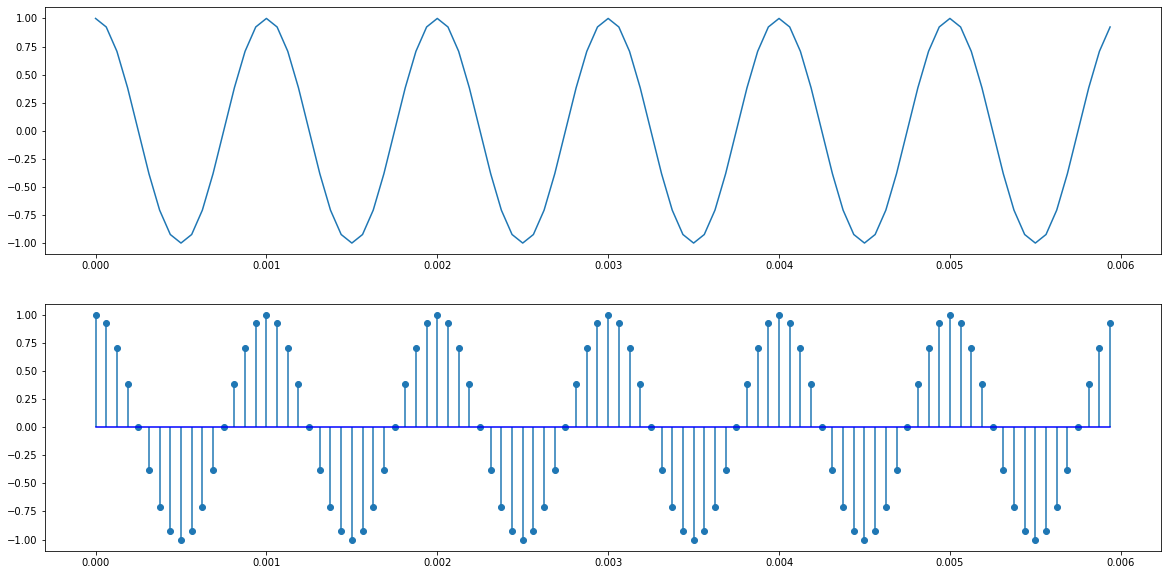

In [11]:
Fs_1b = 16000
f_1b=1000
num_cycles = 6
num_pts_to_plot=int(Fs_1b/f_1b*num_cycles)
sTime_1b=0
(x_1b,y_1b) = GenSampledSinusoid(A=1,Fs=Fs_1b,Freq=f_1b,sTime=sTime_1b,eTime=sTime_1b+1.0/Fs_1b*num_pts_to_plot)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x_1b,y_1b)
plt.subplot(212)
plt.stem(x_1b,y_1b,use_line_collection=True,basefmt="b")

Comment on the relationships between y(t), y[nT]. \
ii. Comment on y[nT] vs y[n]. how is index n related to actual time. \
iii. Proof that the above y[n] (is periodic or not periodic). If periodic, \
how many samples are generated for y[n] for 6 cycles?

ANS:

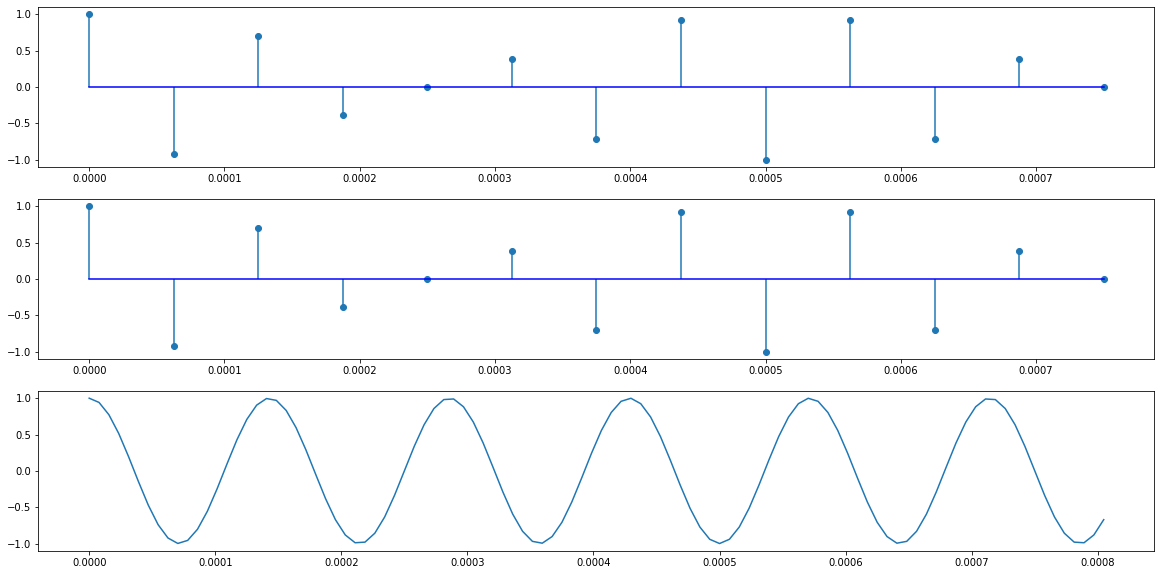

In [12]:
Fs_1b_iv = 16000
f_1b_iv=7000
num_cycles = 6
num_pts_to_plot=int(Fs_1b_iv/f_1b_iv*num_cycles)
sTime_1b_iv=0
(x_1b_iv,y_1b_iv) = GenSampledSinusoid(A=1,Fs=Fs_1b_iv,Freq=f_1b_iv,sTime=sTime_1b_iv,eTime=sTime_1b_iv+1.0/Fs_1b*num_pts_to_plot)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.stem(x_1b_iv,y_1b_iv,use_line_collection=True,basefmt="b")
plt.subplot(312)
plt.stem(x_1b_iv,y_1b_iv,use_line_collection=True,basefmt="b")
(x_1b_iv_n,y_1b_iv_n) = GenSampledSinusoid(A=1,Fs=Fs_1b_iv*8,Freq=f_1b_iv,sTime=sTime_1b_iv,eTime=sTime_1b_iv+1.0/Fs_1b*num_pts_to_plot)
plt.subplot(313)
plt.plot(x_1b_iv_n,y_1b_iv_n)

Now generate the same figure with F = 17000Hz and comment on
what has occurred and the explanation aliasing has on this
phenomenon.

ANS

<StemContainer object of 3 artists>

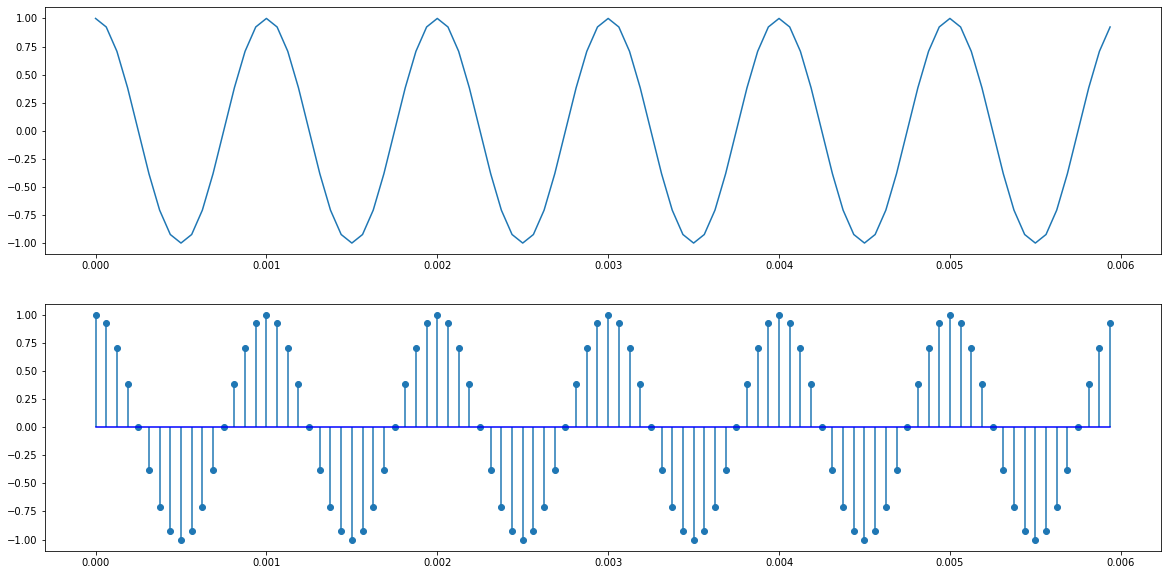

In [13]:
Fs_1c = 16000
f_1c=1000
num_cycles = 6
num_pts_to_plot=int(Fs_1c/f_1c*num_cycles)
sTime_1c=0
(x_1c,y_1c) = GenSampledSinusoid(A=1,Fs=Fs_1c,Freq=f_1c,sTime=sTime_1c,eTime=sTime_1c+1.0/Fs_1c*num_pts_to_plot)
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x_1c,y_1c)
plt.subplot(212)
plt.stem(x_1c,y_1c,use_line_collection=True,basefmt="b")

## 2. DFMT

In [14]:
class DTMFGenerator:
    user_freq = [697.0, 770.0, 852.0, 941.0,1209.0, 1336.0, 1477.0, 1633.0]
    user_tones = {
            '1': (user_freq[0], user_freq[4]),
            '2': (user_freq[0], user_freq[5]),
            '3': (user_freq[0], user_freq[6]),
            'A': (user_freq[0], user_freq[7]),
            '4': (user_freq[1], user_freq[4]),
            '5': (user_freq[1], user_freq[5]),
            '6': (user_freq[1], user_freq[6]),
            'B': (user_freq[1], user_freq[7]),
            '7': (user_freq[2], user_freq[4]),
            '8': (user_freq[2], user_freq[5]),
            '9': (user_freq[2], user_freq[6]),
            'C': (user_freq[2], user_freq[7]),
            '*': (user_freq[3], user_freq[4]),
            '0': (user_freq[3], user_freq[5]),
            '#': (user_freq[3], user_freq[6]),
            'D': (user_freq[3], user_freq[7])
        }
    def genDTMF(key,Fs,dur,A=0.5,sTime=0,Phi=0):
        if key in DTMFGenerator.user_tones:
            (f1,f2) = DTMFGenerator.user_tones.get(key)
            t = np.arange(sTime,dur,1.0/Fs)
            yfloat = A*(np.cos(2*np.pi*f1*t+Phi)+np.cos(2*np.pi*f2*t+Phi))
            return (t,yfloat)
        else:
            print("Press a valid key le")
    def genDTMFseq(keyseq,Fs,durseq,A=0.5,sTime=0,Phi=0):
        assert len(keyseq) == len(durseq), "keyseq len is different from durseq"
        t = np.arange(sTime,sum(durseq),1.0/Fs)
        y = np.array([])
        for index, dur in enumerate(durseq):
            _,y_seg = DTMFGenerator.genDTMF(keyseq[index],Fs,dur)
            y = np.concatenate((y,y_seg),axis=None)
        return (t,y)

In [15]:
DTMFGen = DTMFGenerator()
(t_2,y_2) = DTMFGenerator.genDTMF('1',16000,1.0)
playSoundFromWav(t_2,y_2)

In [16]:
(t_2,y_2) = DTMFGenerator.genDTMFseq('123456789',16000,[0.1*(i+1) for i in range(9)])
playSoundFromWav(t_2,y_2)

## Q3

<StemContainer object of 3 artists>

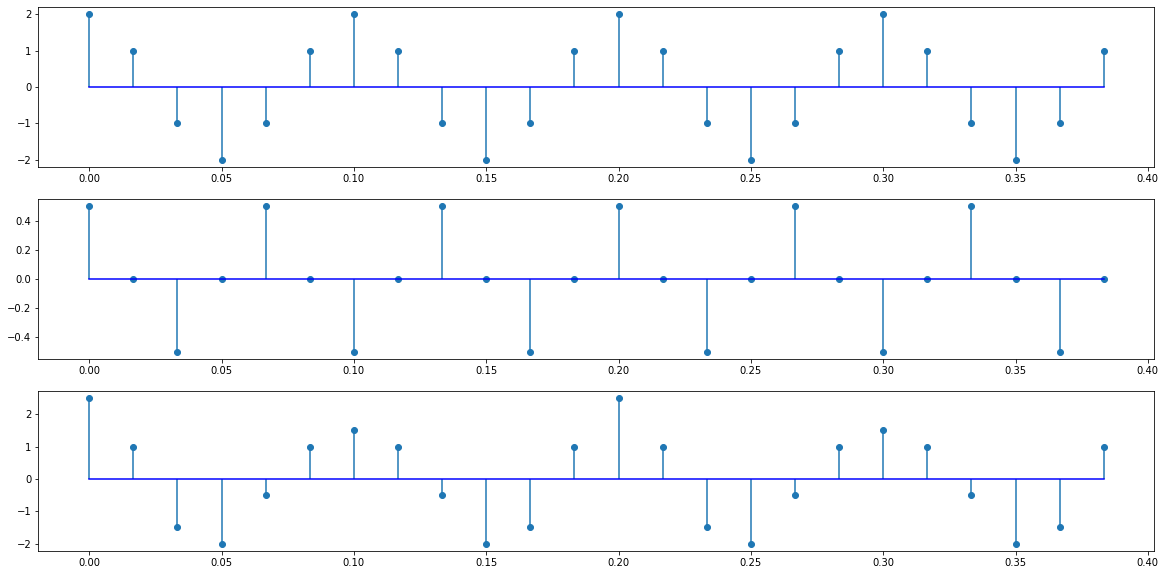

In [17]:
A3 = 2
B3 = 0.5
Fs3= 60
num_cycles = 6
num_pts_to_plot=int(Fs3/15*num_cycles)
sTime3=0


x_n_3,y1_3 = GenSampledSinusoid(A=A3,Freq=10,Phi=0, Fs=Fs3,sTime=sTime3,eTime=sTime3+1.0/Fs3*num_pts_to_plot)
_ , y2_3=GenSampledSinusoid(A=B3,Freq=15,Phi=0, Fs=Fs3,sTime=sTime3,eTime=sTime3+1.0/Fs3*num_pts_to_plot)

plt.figure(figsize=(20,10))
plt.subplot(311)
plt.stem(x_n_3,y1_3,use_line_collection=True,basefmt="b")
plt.subplot(312)
plt.stem(x_n_3,y2_3,use_line_collection=True,basefmt="b")
plt.subplot(313)
plt.stem(x_n_3,y1_3+y2_3,use_line_collection=True,basefmt="b")

$$f3=gcd(f1,f2)$$

d. \
It is a periodic signal so it's a power signal (infinite energy) \
for the period of $f_{3}$, $T_{3}$ of 0.2s = 2 $T_{1}$ = $3 T_{2}$ \
Power of $f_{1}, P_{1}$ is $A^2/2$ \
Power of $f_{2}, P_{2}$ is $B^2/2$ \
Power of $f_{3}$ is 

$
P_{3}= 1/T * \lim_{T\rightarrow \infty} {1 \over {T}} \int_{0}^T |A\cos(2\pi 10 t)+B\cos(2\pi 15 t)|^2 dt \\
= 1/T * \lim_{T\rightarrow \infty} {1 \over {T}} \int_{0}^T [ A^2\cos^2(2\pi 10 t)+B^2\cos^2(2\pi 15 t) +2AB\cos(2\pi 10 t)\cos(2\pi 15 t)]dt \\
= 1/T * \lim_{T\rightarrow \infty} {1 \over {T}} \int_{0}^T [ A^2 *\frac{1 + \cos(2\pi 20 t)}{2} + B^2 *\frac{1 + \cos(2\pi 30 t)}{2}+2AB*\frac{\cos(2\pi25t) + \cos(2\pi5 t)}{2}] dt \\
= 1/T * [ A^2 *(\frac{1}{2}|_{0}^T+ sumsinusoid|_{0}^T ) + B^2 *(\frac{1}{2}|_{0}^{T} + sumsinusoid|_{0}^T) +2AB*sumsinusoid|_{0}^T ]
= \frac{A^2}{2} + \frac{B^2}{2} 
$

_all sinusoid is finish it cycle in T3, lucky case because 5 and 25 as sum as difference, so they cancel each other out. Other than that, the integration might not result in 0_



## Q.4

In [18]:
Amp_4 = 0.95
somega_4 = 2*np.pi/36
phi_4=0

numSamples = 200
n_4 = np.arange(0, numSamples, 1)
y_4= np.multiply(np.power(Amp_4, n_4), np.exp(1j * somega_4 * n_4+phi_4))

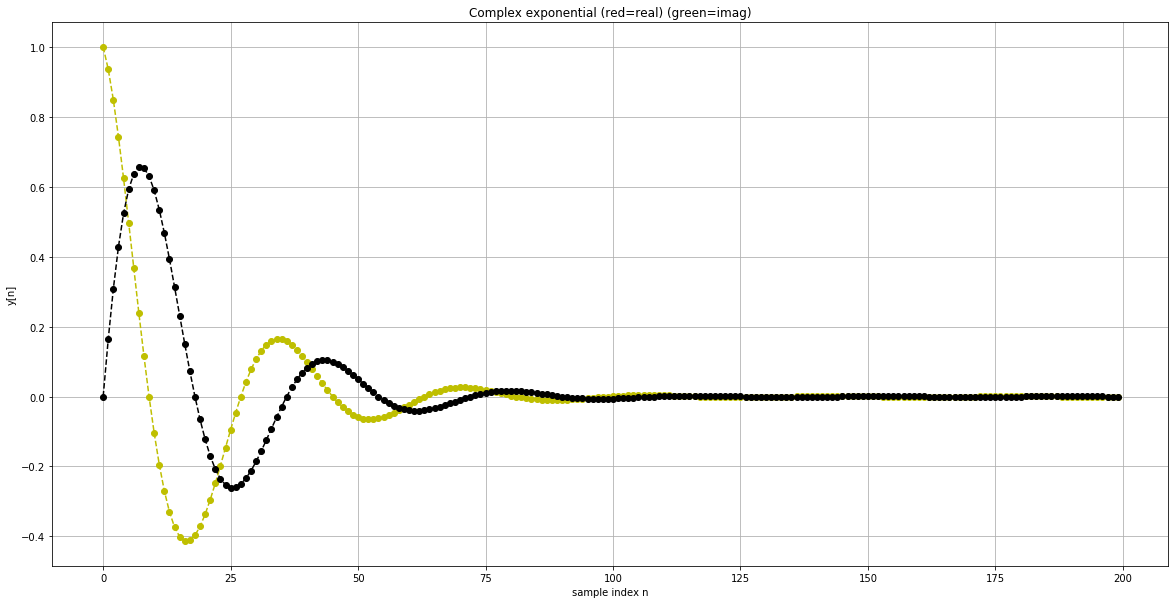

In [19]:
plt.figure(1,figsize=(20,10))
plt.plot(n_4, y_4[0:numSamples].real,'y--o')
plt.plot(n_4, y_4[0:numSamples].imag,'k--o')
plt.xlabel('sample index n'); plt.ylabel('y[n]')
plt.title('Complex exponential (red=real) (green=imag)')
plt.grid()
plt.show()

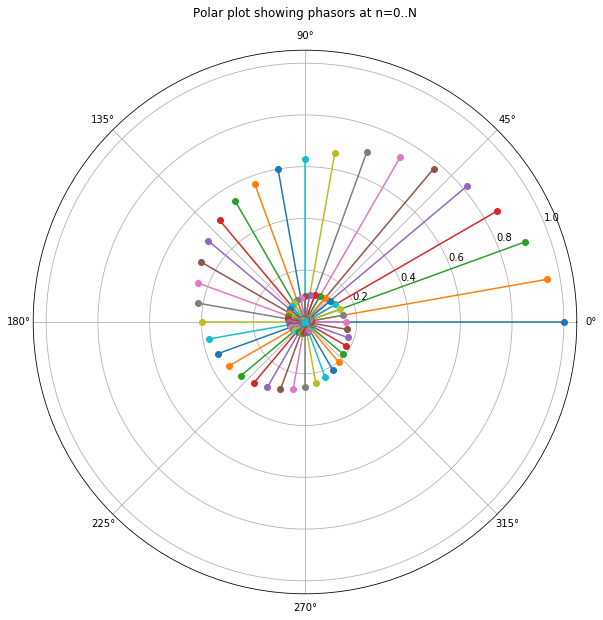

In [20]:
plt.figure(2,figsize=(20,10))
for y in y_4:
    plt.polar([0,np.angle(y)],[0,np.abs(y)],marker='o')

plt.title('Polar plot showing phasors at n=0..N')
plt.show()

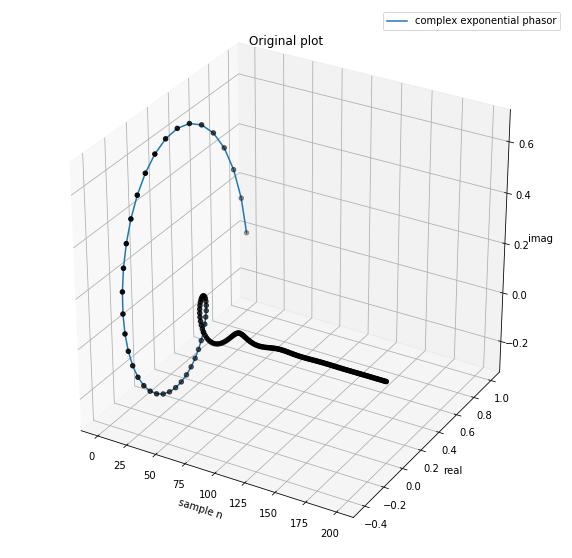

In [21]:
plt.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

scaling_factor = 1
scaling = np.array([np.power(scaling_factor,int(i)) for i in range(len(n_4))])
scaled_y4 = scaling*y_4
reVal = scaled_y4[0:numSamples].real
imgVal = scaled_y4[0:numSamples].imag
ax.plot(n_4,reVal, imgVal,  label='complex exponential phasor')
ax.scatter(n_4,reVal,imgVal, c='k', marker='o')
plt.title("Original plot")
ax.set_xlabel('sample n')
ax.set_ylabel('real')
ax.set_zlabel('imag')
ax.legend()

plt.show()

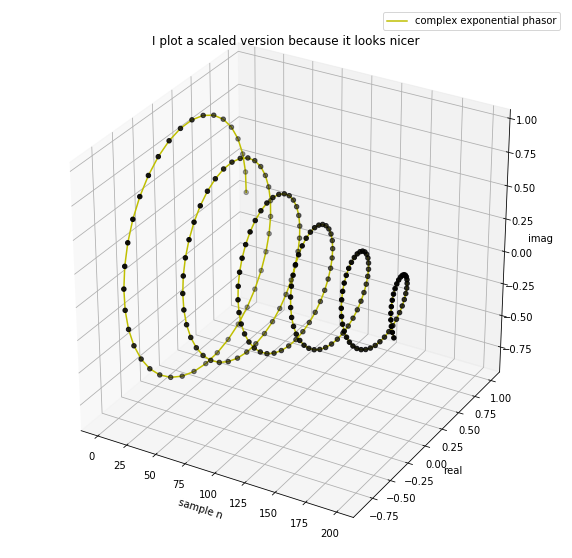

In [33]:
plt.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
scaling_factor = 1.045
scaling = np.array([np.power(scaling_factor,int(i)) for i in range(len(n_4))])
scaled_y4 = scaling*y_4
reVal = scaled_y4[0:numSamples].real
imgVal = scaled_y4[0:numSamples].imag
ax.plot(n_4,reVal, imgVal,c='y',label='complex exponential phasor')
ax.scatter(n_4,reVal,imgVal, c='k', marker='o')
plt.title("I plot a scaled version because it looks nicer")
ax.set_xlabel('sample n')
ax.set_ylabel('real')
ax.set_zlabel('imag')
ax.legend()
plt.show()

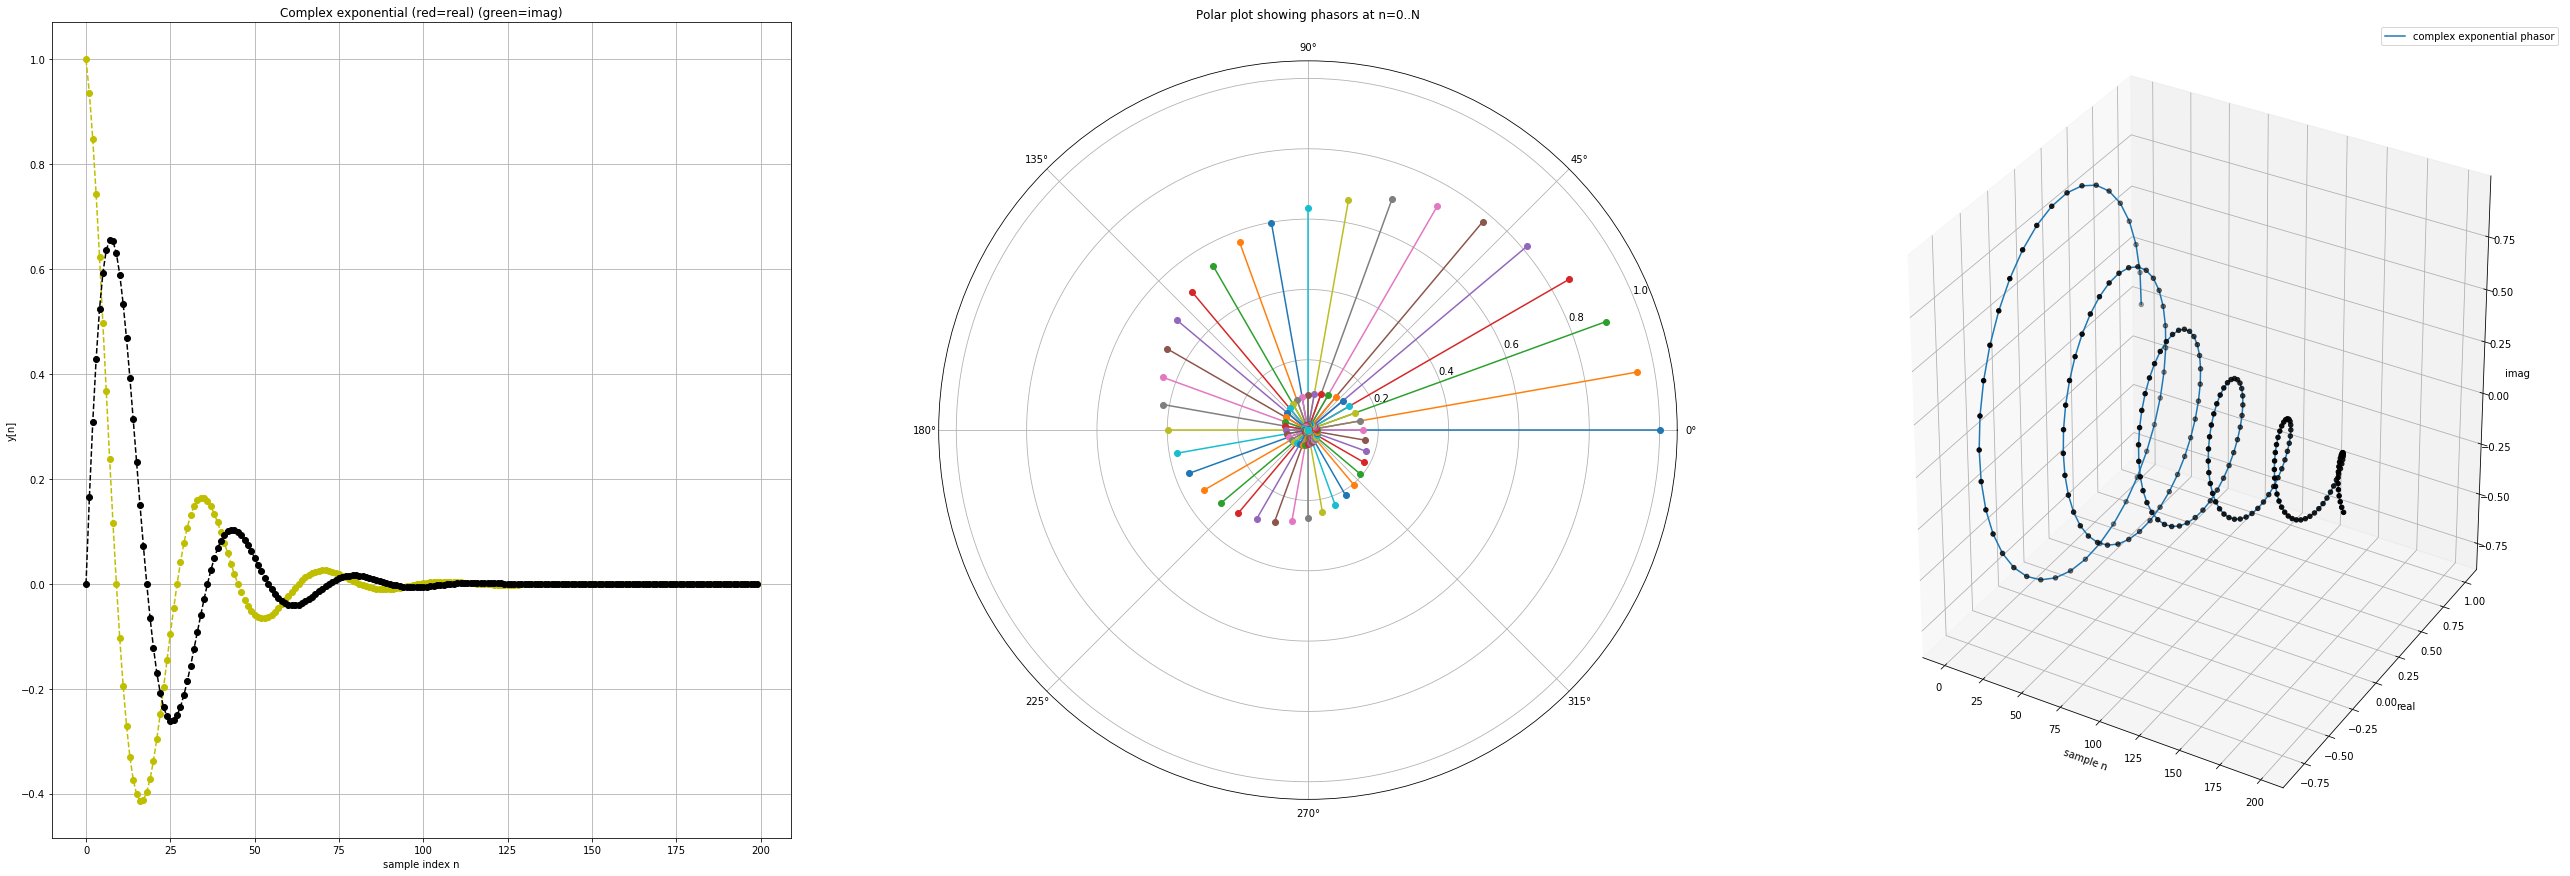

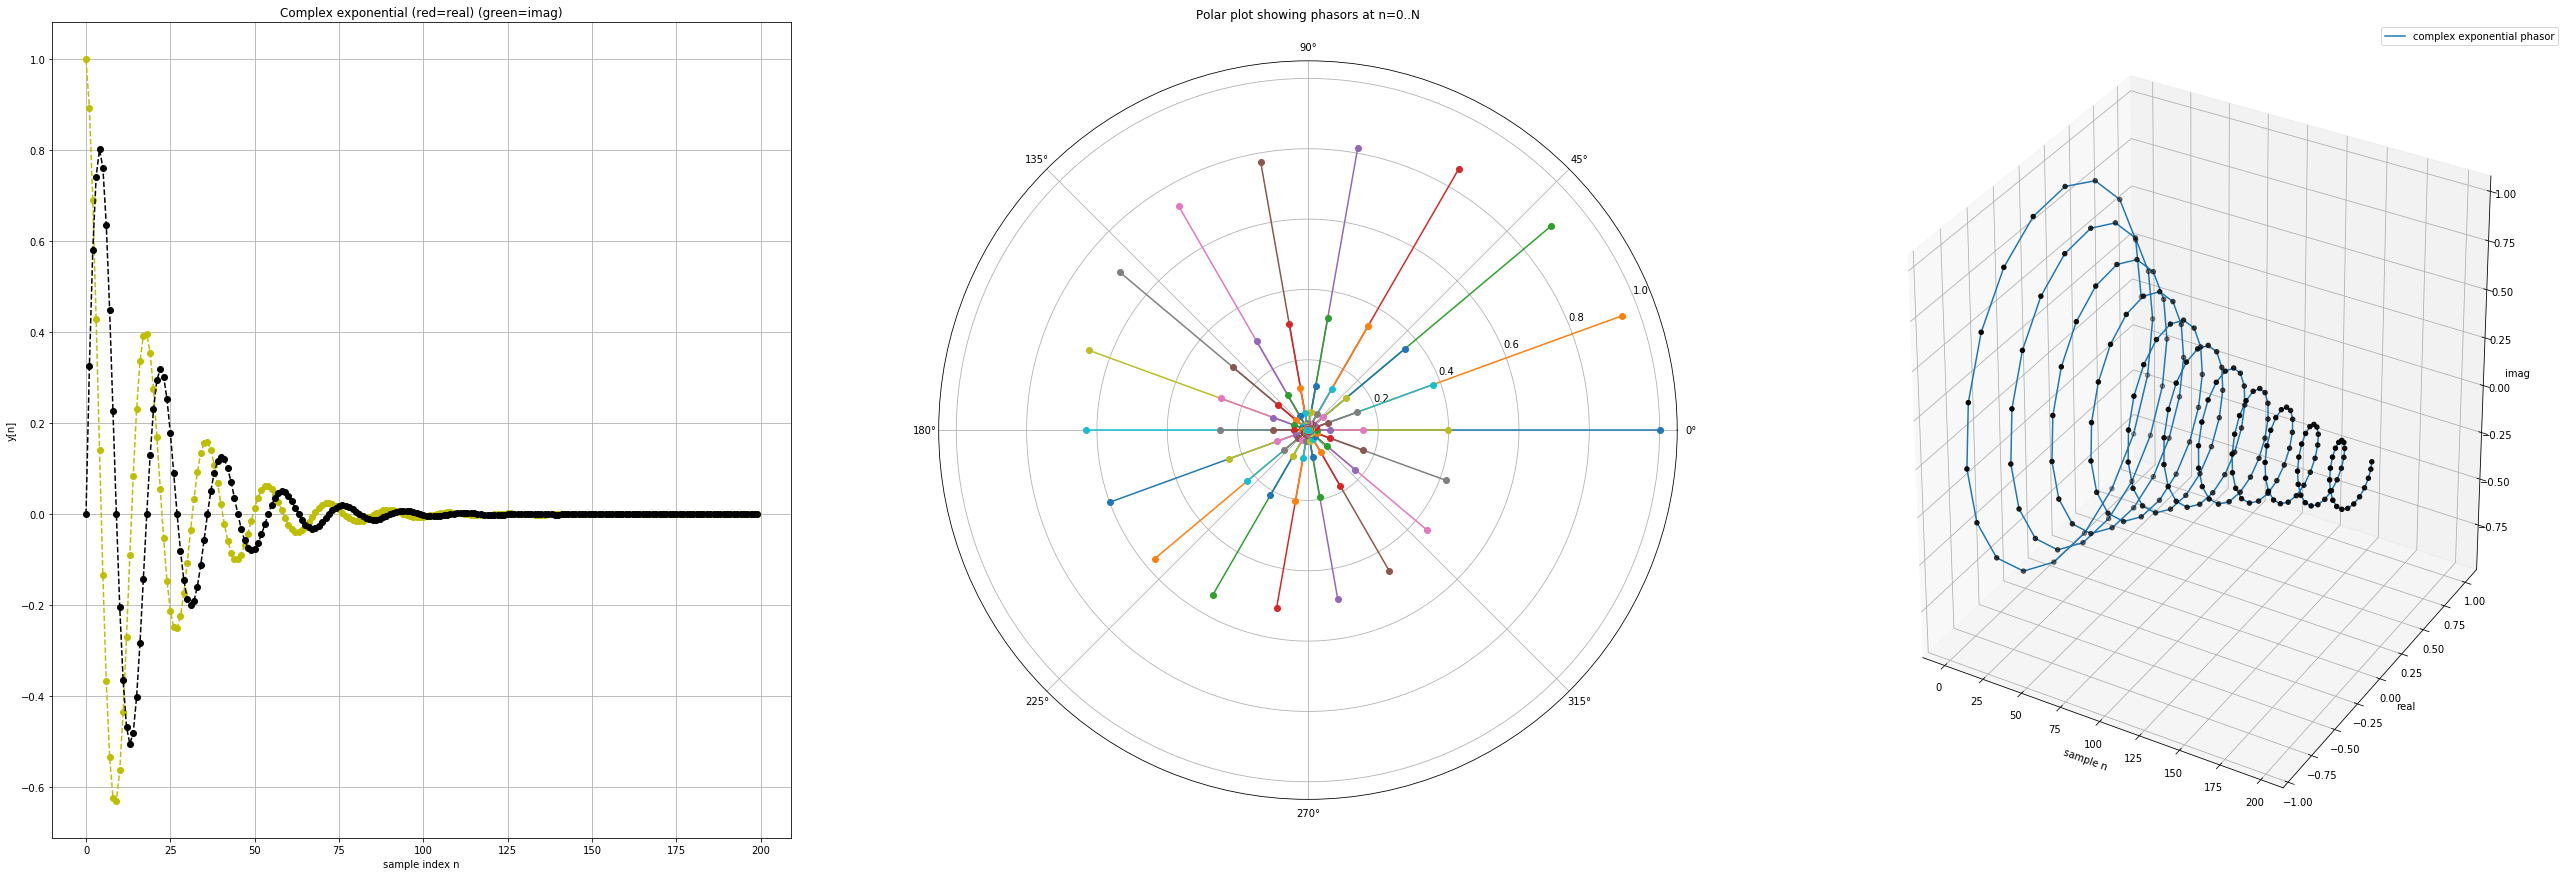

In [32]:
### Packed version 
def qn_4(Amp_4 = 0.95,somega_4 = 2*np.pi/36, phi_4=0,    numSamples = 200):

    n_4 = np.arange(0, numSamples, 1)
    y_4= np.multiply(np.power(Amp_4, n_4), np.exp(1j * somega_4 * n_4+phi_4))
    
    fig = plt.figure(1,figsize=(45,15))
    plt.rcParams['legend.fontsize'] = 10
    plt.subplot(131)
    plt.plot(n_4[0:numSamples], y_4[0:numSamples].real,'y--o')
    plt.plot(n_4[0:numSamples], y_4[0:numSamples].imag,'k--o')
    plt.xlabel('sample index n'); plt.ylabel('y[n]')
    plt.title('Complex exponential (red=real) (green=imag)')
    plt.grid()
    
    plt.subplot(132,projection='polar')
    for y in y_4:
        plt.polar([0,np.angle(y)],[0,np.abs(y)],marker='o')

    plt.title('Polar plot showing phasors at n=0..N')

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    scaling_factor = 1.042
    scaling = np.array([np.power(scaling_factor,int(i)) for i in range(len(n_4))])
    scaled_y4 = scaling*y_4
    reVal = scaled_y4[0:numSamples].real
    imgVal = scaled_y4[0:numSamples].imag
    ax.plot(n_4,reVal, imgVal,  label='complex exponential phasor')
    ax.scatter(n_4,reVal,imgVal, c='k', marker='o')
    ax.set_xlabel('sample n')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    ax.legend()
    plt.show()
    
qn_4()
qn_4(somega_4=2*np.pi/18)

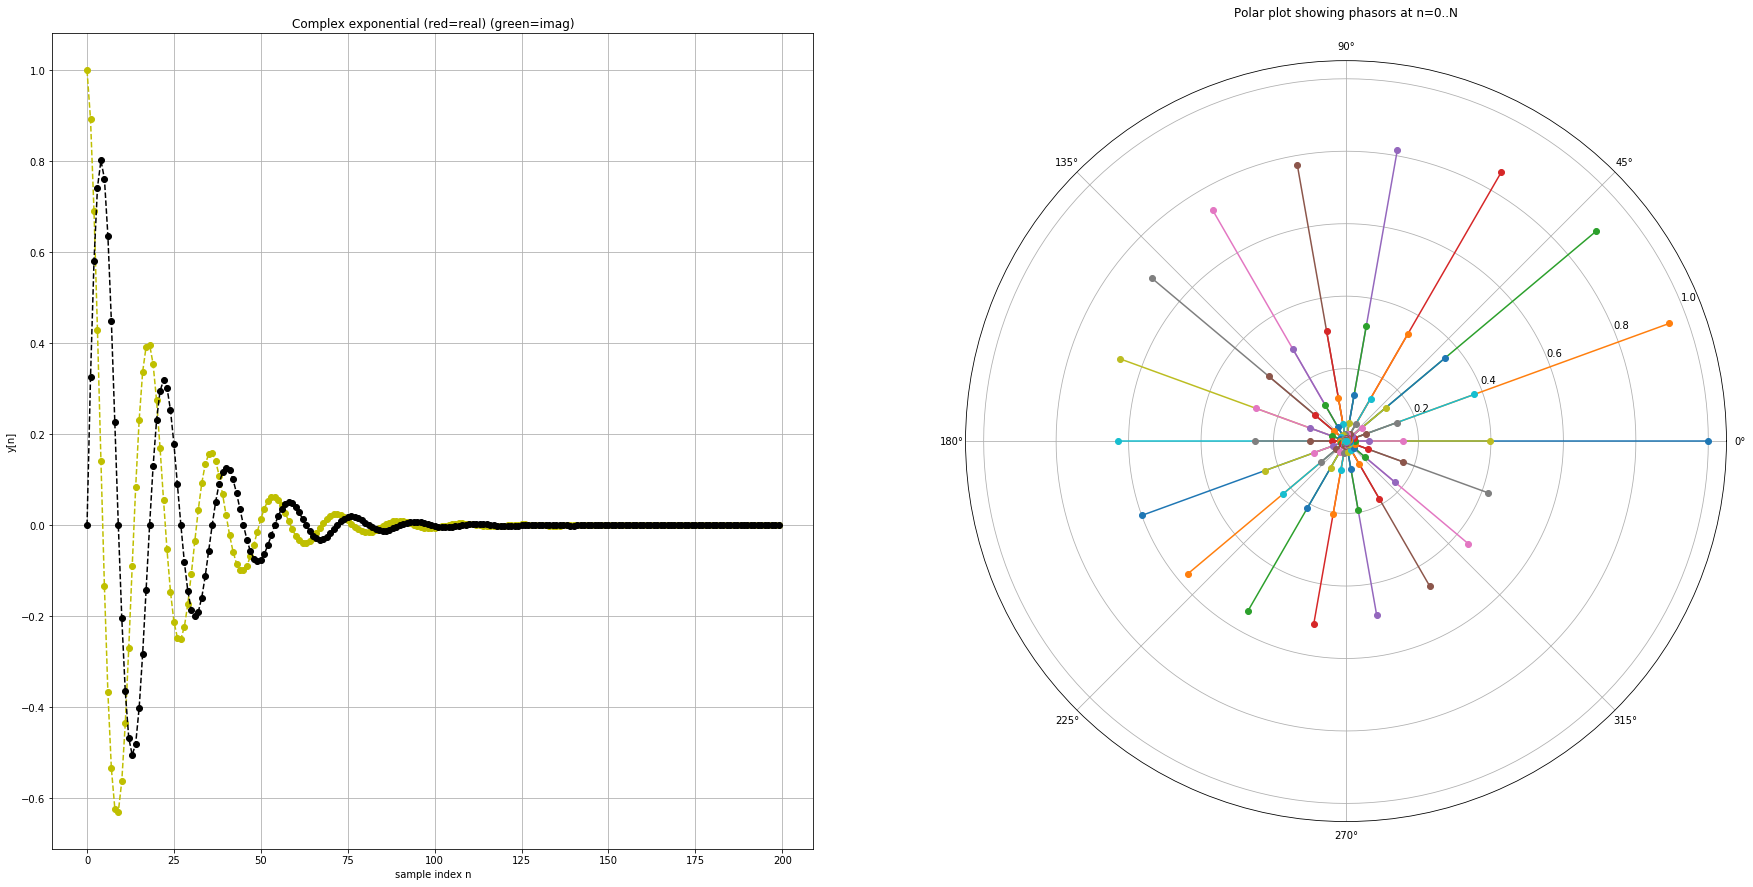

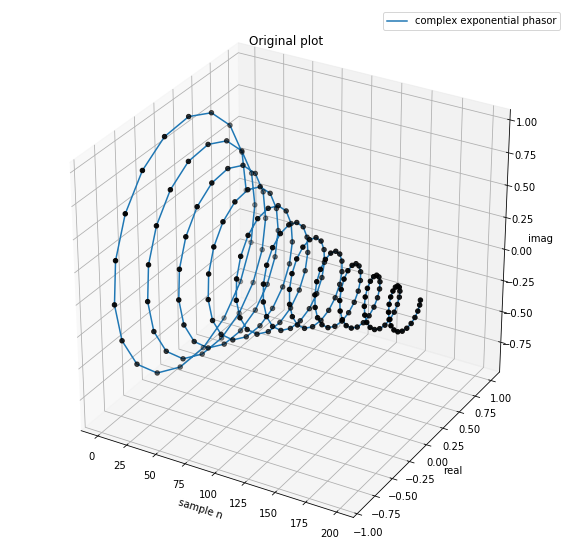

In [74]:
qn_4(somega_4=2*np.pi/18)

## Q5

In [ ]:
Amp_5 = 0.95
somega_5 = 2*np.pi/36
phi_5=0

numSamples = 200
n_4 = np.arange(0, numSamples, 1)
y_4= np.multiply(np.power(Amp_4, n_4), np.exp(1j * somega_4 * n_4+phi_4))